In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math

In [2]:
ddir = "../output_files"
nb = pd.read_csv(f"{ddir}/exhaustiveSelectionTestTrainResultsNB.csv")
params = pd.read_csv(f"{ddir}/n_params.csv")

In [3]:
# '\s+' tells pandas to use any spaces as the delimiter instead of ,
train_df = pd.read_csv("../data/train.2024.04.16.csv")
feature_col_names = np.array(['F01', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13'])

In [4]:
nb["feature_inds_t"] = nb.apply(lambda x: np.array(eval(x["feature_inds"])), axis=1)

In [5]:
nb["train_frac"] = nb.apply(lambda x: train_df[np.all(~np.isnan(train_df[feature_col_names[x["feature_inds_t"]]]), axis=1)].shape[0]/train_df.shape[0], axis=1)

In [8]:
nbSumm = nb.groupby("n_features")["test_mean"].mean().reset_index()
nbSumm["test_std"] = nb.groupby("n_features")["test_mean"].std().values
nbSumm.loc[nbSumm["n_features"] == 13, "test_std"] = 0
nbSumm['train_mean'] = nb.groupby("n_features")["train_mean"].mean().values
nbSumm["train_std"] = nb.groupby("n_features")["train_mean"].std().values
nbSumm.loc[nbSumm["n_features"] == 13, "train_std"] = 0
nbSumm

,n_features,test_mean,test_std,train_mean,train_std
0,1,0.554876,0.122761,0.562027,0.121758
1,2,0.720048,0.091030,0.729566,0.089022
2,3,0.796277,0.061884,0.804878,0.060098
3,4,0.837999,0.048565,0.846554,0.046724
4,5,0.863881,0.039129,0.872246,0.037380
5,6,0.881074,0.032538,0.888759,0.030436
6,7,0.892846,0.027148,0.900522,0.024775
7,8,0.901911,0.022092,0.909646,0.019790
8,9,0.909038,0.017569,0.915763,0.015432
9,10,0.914257,0.013689,0.919992,0.011656


In [9]:
nbData = nb.groupby("n_features")["train_frac"].mean().reset_index()
nbData["std"] = nb.groupby("n_features")["train_frac"].std().values
nbData.loc[nbData["n_features"] == 13, "std"] = 0
nbData

,n_features,train_frac,std
0,1,0.328229,0.146503
1,2,0.227263,0.093026
2,3,0.184374,0.062942
3,4,0.160447,0.048896
4,5,0.144369,0.040729
5,6,0.132464,0.034178
6,7,0.123327,0.028326
7,8,0.116239,0.022840
8,9,0.110765,0.017526
9,10,0.106625,0.012313


In [133]:
max_vals = nb.groupby("n_features")["test_mean"].max().reset_index()
max_vals

,n_features,test_mean
0,1,0.777376
1,2,0.891909
2,3,0.915067
3,4,0.934054
4,5,0.941034
5,6,0.951495
6,7,0.944205
7,8,0.944793
8,9,0.944679
9,10,0.939534


In [144]:
best_df = []
for i in range(13):
    best_df.append(nb[(nb['test_mean'] == max_vals.loc[i]["test_mean"]) & (nb['n_features'] == max_vals.loc[i]["n_features"])])
best_df = pd.concat(best_df)

In [188]:
best_df[['n_features', 'train_std', 'test_std']]

,n_features,train_std,test_std
6,1,0.006628,0.061991
75,2,0.009607,0.079265
140,3,0.005509,0.052175
740,4,0.007134,0.042088
1235,5,0.005346,0.037224
2688,6,0.004981,0.034927
4284,7,0.004540,0.038381
5916,8,0.005327,0.036516
7281,9,0.006843,0.042601
7872,10,0.007274,0.041017


In [189]:
best_df

,feature_inds,n_features,test_mean,test_std,test_fold01,test_fold02,test_fold03,test_fold04,test_fold05,test_fold06,...,train_fold13,train_fold14,train_fold15,train_fold16,train_fold17,train_fold18,train_fold19,train_fold20,feature_inds_t,train_frac
6,"(6,)",1,0.777376,0.061991,0.818685,0.855963,0.782937,0.779975,0.816270,0.745119,...,0.786352,0.775328,0.780795,0.785432,0.781027,0.791631,0.767366,0.786891,[6],0.537276
75,"(6, 12)",2,0.891909,0.079265,0.838405,0.949150,0.696547,0.944109,0.928030,0.947086,...,0.890021,0.892040,0.901441,0.890008,0.892351,0.909061,0.876200,0.893828,"[6, 12]",0.294485
140,"(0, 6, 11)",3,0.915067,0.052175,0.806574,0.949150,0.874775,0.907764,0.926821,0.947086,...,0.914688,0.913343,0.926571,0.913343,0.921209,0.930332,0.912874,0.918268,"[0, 6, 11]",0.122658
740,"(1, 6, 10, 12)",4,0.934054,0.042088,0.933333,0.949150,0.868792,1.000000,0.963285,0.964519,...,0.927687,0.925846,0.939009,0.935144,0.936741,0.952075,0.925362,0.936741,"[1, 6, 10, 12]",0.181262
1235,"(0, 1, 6, 10, 12)",5,0.941034,0.037224,0.933333,0.916045,0.868792,0.928030,1.000000,0.964519,...,0.946606,0.940985,0.946606,0.946606,0.944462,0.955856,0.944375,0.940609,"[0, 1, 6, 10, 12]",0.165980
2688,"(0, 1, 6, 8, 10, 12)",6,0.951495,0.034927,0.933333,0.932917,0.909378,1.000000,0.963285,1.000000,...,0.946543,0.956063,0.955929,0.952061,0.955723,0.953994,0.944286,0.949991,"[0, 1, 6, 8, 10, 12]",0.161595
4284,"(0, 1, 2, 6, 8, 10, 12)",7,0.944205,0.038381,0.933333,0.932917,0.895038,1.000000,0.909378,0.982504,...,0.939070,0.948607,0.952241,0.952179,0.955807,0.948350,0.944526,0.944475,"[0, 1, 2, 6, 8, 10, 12]",0.161595
5916,"(0, 1, 2, 3, 6, 8, 10, 12)",8,0.944793,0.036516,0.933333,0.949150,0.881478,1.000000,0.909378,1.000000,...,0.950140,0.950306,0.952061,0.948291,0.946204,0.953970,0.946204,0.942324,"[0, 1, 2, 3, 6, 8, 10, 12]",0.161595
7281,"(0, 1, 2, 5, 6, 7, 8, 9, 11)",9,0.944679,0.042601,0.911085,0.982504,0.957333,0.963285,0.874775,0.963285,...,0.947482,0.941847,0.955128,0.941847,0.943498,0.955871,0.947297,0.941485,"[0, 1, 2, 5, 6, 7, 8, 9, 11]",0.110166
7872,"(0, 1, 2, 3, 5, 6, 7, 8, 10, 11)",10,0.939534,0.041017,0.933333,0.963745,0.974828,0.963285,0.874775,0.947086,...,0.943607,0.934323,0.939941,0.943862,0.933916,0.951811,0.937697,0.930035,"[0, 1, 2, 3, 5, 6, 7, 8, 10, 11]",0.100598


In [191]:
best_diffs = []
for _, row in best_df.iterrows():
    for i in range(1, 21):
        diff = row[f"train_fold{i:02d}"] - row[f"test_fold{i:02d}"]
        best_diffs.append([row["n_features"], i, diff])


In [199]:
best_diffs_df = pd.DataFrame(best_diffs, columns=["n_features", "fold", "train_test_diff"])

In [272]:
best_diffs_summ_df = best_diffs_df.groupby("n_features")["train_test_diff"].mean().reset_index().rename(columns={"train_test_diff":"mean"})
best_diffs_summ_df["std"] = best_diffs_df.groupby("n_features")["train_test_diff"].std().values
best_diffs_summ_df["min"] = best_diffs_df.groupby("n_features")["train_test_diff"].min().values
best_diffs_summ_df["max"] = best_diffs_df.groupby("n_features")["train_test_diff"].max().values
best_diffs_summ_df

,n_features,mean,std,min,max
0,1,0.005778,0.069889,-0.156506,0.172352
1,2,0.000618,0.090282,-0.123800,0.216654
2,3,0.004046,0.058401,-0.093275,0.138464
3,4,-0.001125,0.048766,-0.070430,0.129853
4,5,0.006158,0.042917,-0.059302,0.092923
5,6,-0.002011,0.039536,-0.059124,0.060661
6,7,0.002166,0.041961,-0.063030,0.087239
7,8,0.002926,0.041434,-0.061053,0.072600
8,9,0.001356,0.048513,-0.058519,0.098190
9,10,-0.000657,0.048405,-0.069969,0.084147


In [253]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def plot_curves(df, title, best_df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()


    ax.plot(df["n_features"], df["train_mean"], marker="x", color="C1", label="train score mean")
    ax.fill_between(df["n_features"], 
                    df["train_mean"]-df["train_std"], 
                    df["train_mean"]+df["train_std"], 
                    label="train score std",
                    color="C1",
                    alpha=0.5)
    
    ax.plot(df["n_features"], df["test_mean"], marker="x", color="k", label="test score mean")
    ax.fill_between(df["n_features"], 
                    df["test_mean"]-df["test_std"], 
                    df["test_mean"]+df["test_std"], 
                    label="test score std",
                    color="k",
                    alpha=0.5)
    ax.set_ylim([0.4, 1.01])
    ax.set_title(title)
    ax.set_xticks(df["n_features"]);
    ax.set_ylabel("CV Mean F1 Score")
    ax.set_xlabel("Number of Features")

    ax.errorbar(best_df["n_features"],
                best_df["test_mean"], 
                best_df["test_std"], marker="s", label="Best-Test", color="darkgreen")
    ax.errorbar(best_df["n_features"],
                best_df["train_mean"], 
                best_df["train_std"], marker="o", label="Best-Train", color="purple")
    
    # ax2 = ax.twinx()

    # ax2.errorbar(best_diffs_summ_df["n_features"],
    #             best_diffs_summ_df["mean"], 
    #             best_diffs_summ_df["std"], marker="^", color="C0", label="Mean Score Difference")
    # ax2.set_ylabel("Training - Testing Score")
    # ax2.yaxis.label.set_color("C0")
    # ax2.tick_params(axis='y', colors="C0")

    lkw = dict(borderpad=0.1, labelspacing=0.2, handletextpad=0.4)
    ax.legend(loc=(0.67, 0.05), **lkw)
    # ax2.legend(loc=(0.6, 0.01), **lkw)
    ax.grid(axis="y")

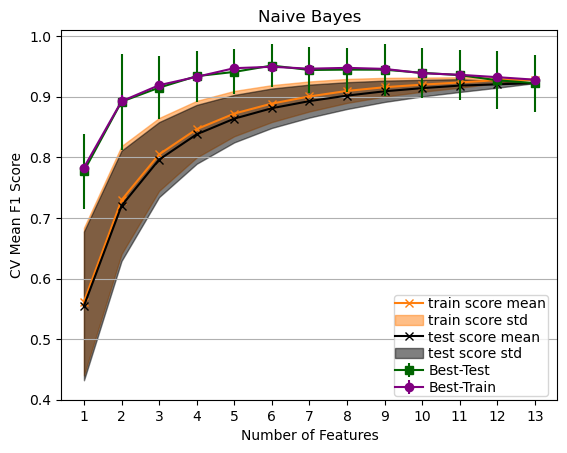

In [252]:
plot_curves(nbSumm, "Naive Bayes", best_df)

In [280]:
best_diffs_df[best_diffs_df["n_features"] == i+1]["train_test_diff"]

0    -0.039035
1    -0.086044
2    -0.003709
3     0.004143
4    -0.036309
5     0.042604
6     0.031608
7     0.103991
8     0.007010
9     0.029751
10    0.036513
11    0.063760
12    0.025746
13   -0.072793
14   -0.028172
15    0.019223
16   -0.030189
17    0.172352
18   -0.156506
19    0.031608
Name: train_test_diff, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Number of Features')

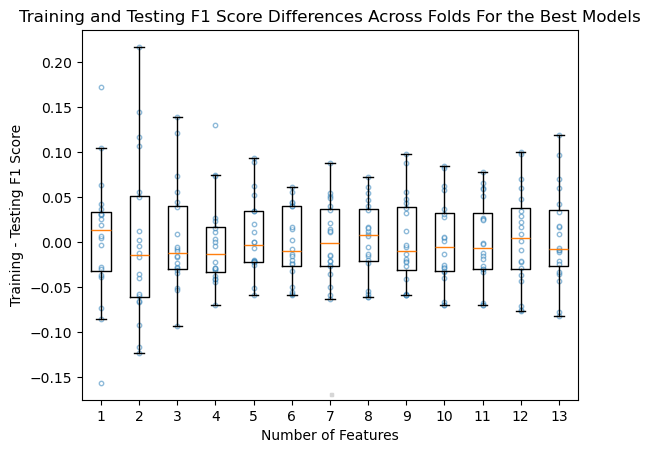

In [309]:
fig, ax2 = plt.subplots()
ax2.scatter(best_diffs_df["n_features"], best_diffs_df["train_test_diff"], s=10, edgecolors="C0", color="white", alpha=0.5)

for i in range(13):
    ax2.boxplot(best_diffs_df[best_diffs_df["n_features"] == i+1]["train_test_diff"], vert=True, positions=[i+1], showfliers=False, widths=0.5)

ax2.set_ylabel("Training - Testing F1 Score")
lkw = dict(borderpad=0.1, labelspacing=0.2, handletextpad=0.4)
ax2.legend(loc=(0.5, 0.01), **lkw)
ax2.set_title("Training and Testing F1 Score Differences Across Folds For the Best Models")
ax2.set_xlabel("Number of Features")

Text(0.5, 0, 'Number of Features')

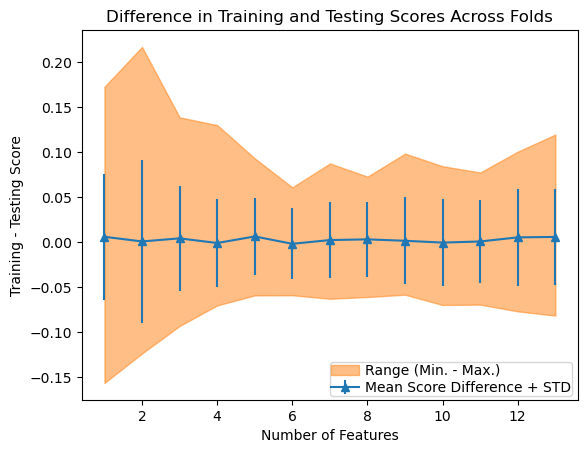

In [274]:
fig, ax2 = plt.subplots()
ax2.errorbar(best_diffs_summ_df["n_features"],
            best_diffs_summ_df["mean"], 
            best_diffs_summ_df["std"], marker="^", color="C0", label="Mean Score Difference + STD")
ax2.fill_between(best_diffs_summ_df["n_features"], 
                best_diffs_summ_df["min"], 
                best_diffs_summ_df["max"], 
                label="Range (Min. - Max.)",
                color="C1",
                alpha=0.5)
ax2.set_ylabel("Training - Testing Score")
lkw = dict(borderpad=0.1, labelspacing=0.2, handletextpad=0.4)
ax2.legend(loc=(0.5, 0.01), **lkw)
ax2.set_title("Difference in Training and Testing Scores Across Folds")
ax2.set_xlabel("Number of Features")

In [35]:
nb[["test_mean", "test_std", "train_mean", "train_std"]]

,test_mean,test_std,train_mean,train_std
0,0.475280,0.043276,0.476240,0.005744
1,0.459459,0.064098,0.476686,0.009384
2,0.402200,0.047345,0.428661,0.011187
3,0.507235,0.043494,0.509028,0.004688
4,0.430973,0.055880,0.433905,0.010779
...,...,...,...,...
8186,0.925593,0.049158,0.931931,0.006089
8187,0.921798,0.047601,0.927596,0.006289
8188,0.909779,0.050840,0.918725,0.006513
8189,0.917425,0.047220,0.921310,0.007739


In [85]:
train_test_diffs = (nb["train_mean"] - nb["test_mean"])

In [86]:
all_diffs = []
for i in range(1, 21):
    diffs = nb[f"train_fold{i:02d}"] - nb[f"test_fold{i:02d}"]
    all_diffs.append(diffs.values)
all_diffs = np.concatenate(all_diffs)
print(all_diffs.shape)
print(20*8191)

(163820,)
163820


In [87]:
print(np.max(all_diffs), np.min(all_diffs))

0.29879526288908015 -0.21735801892928253


In [88]:
np.std(all_diffs)

0.055884627381643896

Text(0.5, 0, 'Train - Test Mean F1 Score')

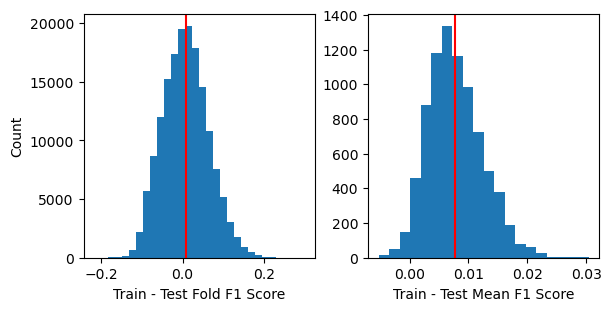

In [126]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 3))

axes[0].hist(all_diffs, bins=30);
axes[0].axvline(np.mean(all_diffs), color='r')
axes[0].set_xlabel("Train - Test Fold F1 Score")
axes[0].set_ylabel("Count")

axes[1].hist(train_test_diffs, bins=20);
axes[1].axvline(np.mean(train_test_diffs), color='r')
axes[1].set_xlabel("Train - Test Mean F1 Score")


(0.0, 0.1)

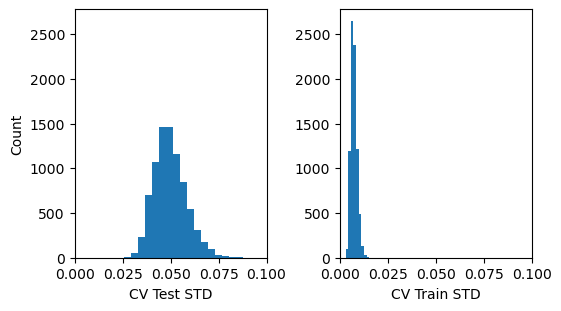

In [110]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(5.5, 3))

axes[0].hist(nb["test_std"], bins=20);
axes[0].set_xlabel("CV Test STD")
axes[0].set_ylabel("Count")
axes[0].set_xlim([0, 0.1])

axes[1].hist(nb["train_std"], bins=20);
axes[1].set_xlabel("CV Train STD")
axes[1].sharey(axes[0])
axes[1].set_xlim([0, 0.1])


(0.4, 1.1)

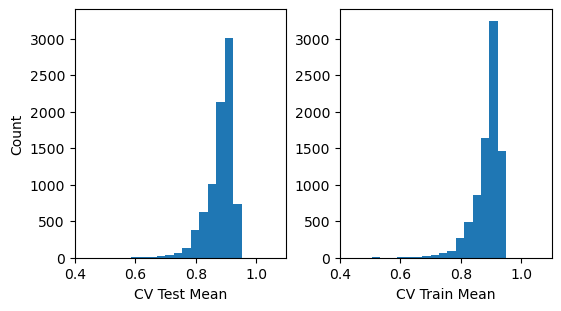

In [118]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(5.5, 3))

axes[0].hist(nb["test_mean"], bins=20);
axes[0].set_xlabel("CV Test Mean")
axes[0].set_ylabel("Count")
axes[0].set_xlim([0.4, 1.1])

axes[1].hist(nb["train_mean"], bins=20);
axes[1].set_xlabel("CV Train Mean")
axes[1].sharey(axes[0])
axes[1].set_xlim([0.4, 1.1])

In [151]:
nbData.columns = ['n_features', 'train_frac_mean', 'train_frac_std']
nbData

,n_features,train_frac_mean,train_frac_std
0,1,0.328229,0.146503
1,2,0.227263,0.093026
2,3,0.184374,0.062942
3,4,0.160447,0.048896
4,5,0.144369,0.040729
5,6,0.132464,0.034178
6,7,0.123327,0.028326
7,8,0.116239,0.022840
8,9,0.110765,0.017526
9,10,0.106625,0.012313
